# Decision Tree & Random Forest

To begin our analysis, we must first obtain the dataset. We achieve this using the ‘wget’ command. The following console command, which starts with ‘!’, allows us to download the CSV file from the web. We access the data by referencing the URL stored in the ‘data’ variable.

In [ ]:
!wget https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv

--2024-05-03 12:33:47--  https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv’

CreditScoring.csv   100%[===================>] 178.21K  --.-KB/s    in 0.02s   

2024-05-03 12:33:47 (11.1 MB/s) - ‘CreditScoring.csv’ saved [182489/182489]



to build a model that predicts whether a bank should lend loan to a client or not. The bank takes these decisions based on the historical record.

In the credit scoring classification problem,

if the model returns 0, this means, the client is very likely to payback the loan and the bank will approve the loan.
if the model returns 1, then the client is considered as a defaulter and the bank may not approval the loan.

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
df = pd.read_csv('/content/CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


# Dataset Preparation

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [ ]:
df.dtypes

status       int64
seniority    int64
home         int64
time         int64
age          int64
marital      int64
records      int64
job          int64
expenses     int64
income       int64
assets       int64
debt         int64
amount       int64
price        int64
dtype: object

**Re-encoding the categorical variables**

In [ ]:
df.describe()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,1.281257,7.987205,2.657015,46.441751,37.077666,1.879012,1.173513,1.675870,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,0.450162,8.173444,1.610467,14.655225,10.984856,0.643748,0.378733,0.954035,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,0.000000,0.000000,6.000000,18.000000,0.000000,1.000000,0.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,1.000000,2.000000,2.000000,36.000000,28.000000,2.000000,1.000000,1.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,1.000000,5.000000,2.000000,48.000000,36.000000,2.000000,1.000000,1.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,2.000000,12.000000,4.000000,60.000000,45.000000,2.000000,1.000000,3.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,2.000000,48.000000,6.000000,72.000000,68.000000,5.000000,2.000000,4.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


**Re-encoding status column**

In [ ]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [ ]:
status_values = {
    1:'ok',
    2:'default',
    0:'unknown'
}

In [ ]:
df.status = df.status.map(status_values)

In [ ]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


**Re-encoding home column**

In [ ]:
df.home.value_counts()

home
2    2107
1     973
5     783
6     319
3     247
4      20
0       6
Name: count, dtype: int64

In [ ]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

In [ ]:
df.home = df.home.map(home_values)

In [ ]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,rent,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,owner,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,rent,36,26,1,1,1,46,107,0,0,310,910


**Re-encoding marital column**

In [ ]:
df.marital.value_counts()

marital
2    3241
1     978
4     130
3      67
5      38
0       1
Name: count, dtype: int64

In [ ]:
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

In [ ]:
df.marital=df.marital.map(marital_values)

In [ ]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,1,3,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,1,1,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,2,3,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,1,1,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,1,1,46,107,0,0,310,910


**Re-encoding records column**

In [ ]:
df.records.value_counts()

records
1    3682
2     773
Name: count, dtype: int64

In [ ]:
records_values = {
    1: 'no',
    2: 'yes'
}

In [ ]:
df.records = df.records.map(records_values)

In [ ]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,3,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,1,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,3,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,1,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,1,46,107,0,0,310,910


**Re-encoding the job column**

In [ ]:
df.job.value_counts()

job
1    2806
3    1024
2     452
4     171
0       2
Name: count, dtype: int64

In [ ]:
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

In [ ]:
df.job=df.job.map(job_values)

In [ ]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


**Handle missing values**
With all categorical variables decoded back to strings, the next step is to address the missing values.

In [ ]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


It’s apparent that ‘income,’ ‘assets,’ and ‘debt’ columns contain extremely large values (e.g., 99999999.0) as maximum values. To address this issue, we need to replace these outlier values. Let’s explore the replacement process.

In [ ]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


While analyzing the ‘status’ and 'marital' column, we discovered a single record with the value ‘unk,’ representing a missing or unknown status.  , we can safely remove this record from the dataframe.

In [ ]:
df = df[df.status != 'unknown'].reset_index(drop=True)
df = df[df.status != 'unknown'].reset_index(drop=True)
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,default,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020
4450,ok,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4451,default,0,owner,24,37,married,no,partime,60,90.0,3500.0,0.0,500,963
4452,ok,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550


# Splitting the dataset

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(2672, 14)
(891, 14)
(891, 14)


In [ ]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [ ]:
del df_train['status']
del df_val['status']
del df_test['status']

# Training a decision tree classifier

In [ ]:
df_train.isnull().sum()

seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       25
assets       30
debt         11
amount        0
price         0
dtype: int64

In [ ]:
df_train = df_train.fillna(0)

In [ ]:
train_dicts = df_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [ ]:
X_train.shape

(2672, 29)

In [ ]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(X_train)

In [ ]:
roc_auc_score(y_train,y_pred)  #training accuracy

1.0

**Validation**

In [ ]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [ ]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [ ]:
y_pred = dt.predict(X_val)

In [ ]:
roc_auc_score(y_val,y_pred)  #accurcy on a validation dataset

0.6556362161245791

# Overfitting Problem
This differnece between training accurray and validation is called overfitting. Overfitting is when our model simply memorizes the data, but it memorizes in such a way that when it sees a new example it doesn’t know what to do with this example. So it memorizes the training data but it fails to generalize. The reason why this happens to decision trees is that the model creates a specific rule for each example. That works fine for training data, but it doesn’t work for any unseen example. The reason why this can happens is, that we let the tree grow too deep. If we restrict the tree to only grow up to certain levels deep, the tree will learn rules that are less specific.

In [ ]:
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(X_train,y_train)
y_pred_train = dt.predict(X_train)
print(roc_auc_score(y_train,y_pred_train))

y_pred_val = dt.predict(X_val)
print(roc_auc_score(y_val,y_pred_val))


0.6837333107993916
0.6376631711510984


# Hyperparameter Tunning

Parameter tuning involves selecting the best parameters for training. In this context, ‘tuning’ means choosing parameters in a way that maximizes or minimizes a chosen performance metric (such as AUC or RMSE) on the validation set. In the case of AUC, our goal is to maximize it on the validation set by finding the parameter values that yield the highest score.

Some of the key parameters include:

**criterion:**This parameter determines the impurity measure used for splitting. You can choose between ‘gini’ for Gini impurity and ‘entropy’ for information gain. The choice of criterion can significantly impact the quality of the splits in the decision tree.

**max_depth:**This parameter controls the maximum depth of the decision tree. It plays a crucial role in preventing overfitting by limiting the complexity of the tree. Selecting an appropriate value for max_depth helps strike a balance between model simplicity and complexity.

**min_samples_leaf:** This parameter specifies the minimum number of samples required in a leaf node. It influences the granularity of the splits. Smaller values can result in finer splits and a more complex tree, while larger values lead to coarser splits and a simpler tree.

**Max_depth**

In [ ]:
scores = []
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]
for depth in depths:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict(X_val)
        auc = roc_auc_score(y_val, y_pred)

        scores.append((depth, s, auc))

columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
49,6.0,15,0.700077
68,15.0,20,0.690050
50,6.0,20,0.688101
77,20.0,20,0.687353
58,10.0,15,0.687256


# Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10,random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [ ]:
y_pred = rf.predict(X_val)
roc_auc_score(y_val,y_pred)

0.6471204378678163

**Fine Tuning Random Forest Model**

In [ ]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append((n, auc))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.774473
1,20,0.803532
2,30,0.815075
3,40,0.815686
4,50,0.817082
5,60,0.816458
6,70,0.817321
7,80,0.816307
8,90,0.816824
9,100,0.817599


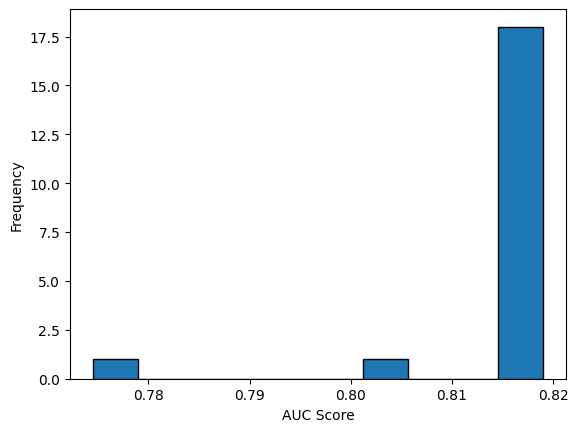

In [ ]:
# @title Distribution of AUC Scores by Number of Estimators

import matplotlib.pyplot as plt
plt.hist(df_scores['auc'], bins=10, edgecolor='black')
plt.xlabel('AUC Score')
_ = plt.ylabel('Frequency')